In [1]:
import pickle, os
os.chdir("../")

import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

from pythia.common.registry import registry
from pythia.models.pythia import Pythia
from pythia.modules.layers import ClassifierLayer
from pythia.modules.multi_modal_gnn import MultiModalGNN

In [20]:
data = np.load("/home/like/Datasets/Pythia/data/imdb/textvqa_0.5/imdb_textvqa_train.npy", 
               allow_pickle=True)[1:]
print(data[0].keys())
len(data)

dict_keys(['question', 'image_id', 'image_classes', 'flickr_original_url', 'flickr_300k_url', 'image_width', 'image_height', 'answers', 'ocr_tokens', 'ocr_info', 'question_tokens', 'question_id', 'set_name', 'image_name', 'image_path', 'feature_path', 'valid_answers'])


34602

In [23]:
train_questions = {}
for i in range(len(data)):
    train_questions[data[i]["question_id"]]=data[i]["question"]
len(train_questions)

34602

In [2]:
with open("/home/like/Workplace/Text_VQA/explorer/sample_list.p", 'rb') as f:
    sp = pickle.load(f)
sp.keys()

odict_keys(['text', 'question_id', 'image_id', 'text_len', 'image_feature_0', 'image_info_0', 'image_feature_1', 'image_info_1', 'likeliness', 'context', 'context_tokens', 'context_feature_0', 'context_info_0', 'order_vectors', 'ocr_bbox', 'mask_s', 'value_tokens', 'value_embeddings', 'mask_v', 'answers', 'targets', 'center_point_rcnn', 'center_point_resnet', 'center_point_ocr', 'bb_rcnn', 'bb_resnet', 'bb_ocr', 'dataset_type', 'dataset_name'])

In [3]:
sp["bb_rcnn"][0].shape

torch.Size([100, 4])

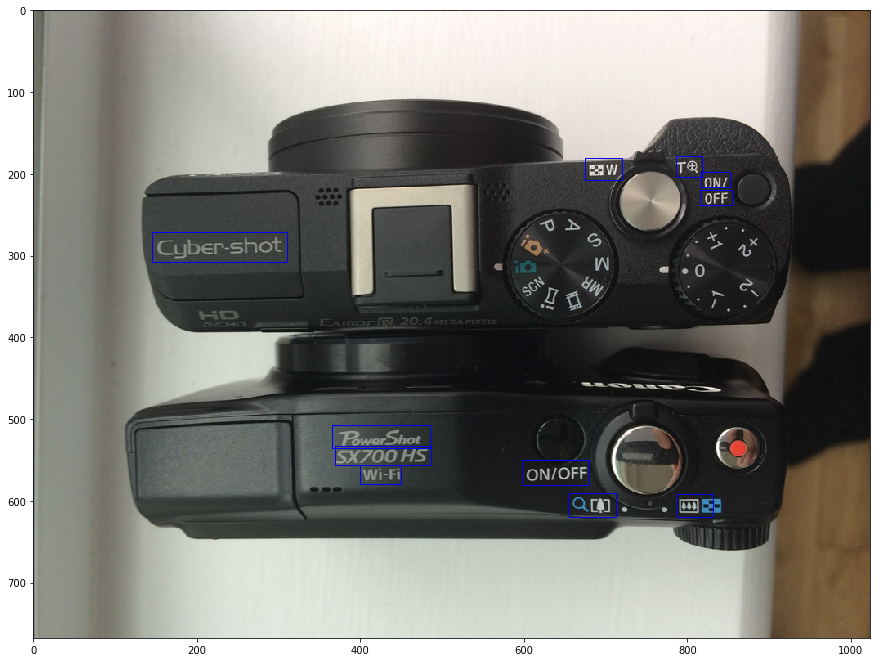

In [18]:
i = random.randint(0, 127)
image_id = sp["image_id"][i]
im = np.array(Image.open(os.path.join("/home/like/Datasets/Pythia/train_images", image_id+".jpg")), dtype=np.uint8)
fig,ax = plt.subplots(1, figsize=(15, 15))
ax.imshow(im)
for j in range(50):
    pat = sp["bb_ocr"][i][j]
    rect = patches.Rectangle((pat[0], pat[1]),pat[2]-pat[0],pat[3]-pat[1],linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)
plt.show()

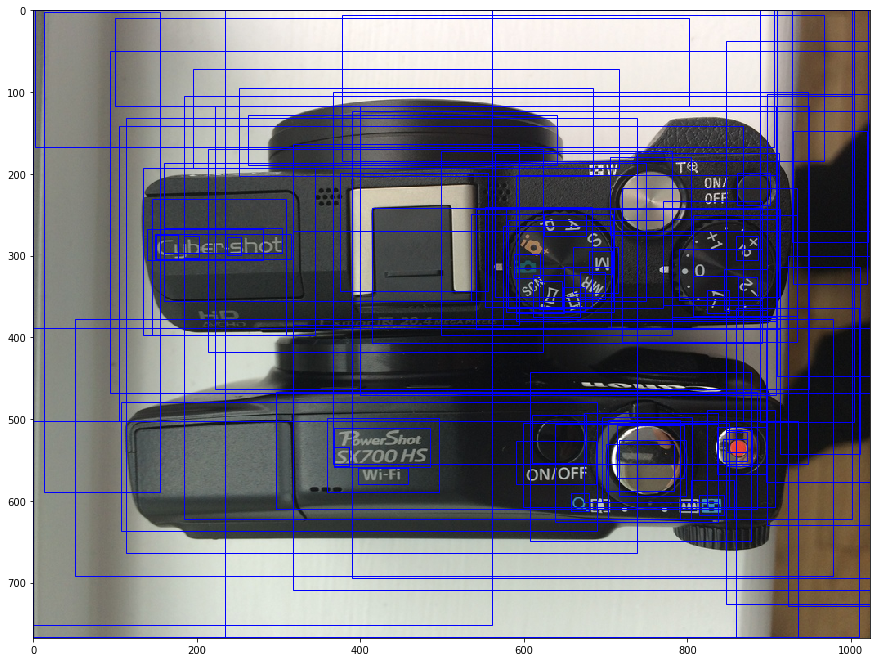

In [19]:
# i = random.randint(0, 127)
image_id = sp["image_id"][i]
im = np.array(Image.open(os.path.join("/home/like/Datasets/Pythia/train_images", image_id+".jpg")), dtype=np.uint8)
fig,ax = plt.subplots(1, figsize=(15, 15))
ax.imshow(im)
for j in range(100):
    pat = sp["bb_rcnn"][i][j]
    rect = patches.Rectangle((pat[0], pat[1]),pat[2]-pat[0],pat[3]-pat[1],linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)
plt.show()

In [26]:
sp["question_id"][i]

IndexError: index 34601 is out of bounds for dimension 0 with size 128

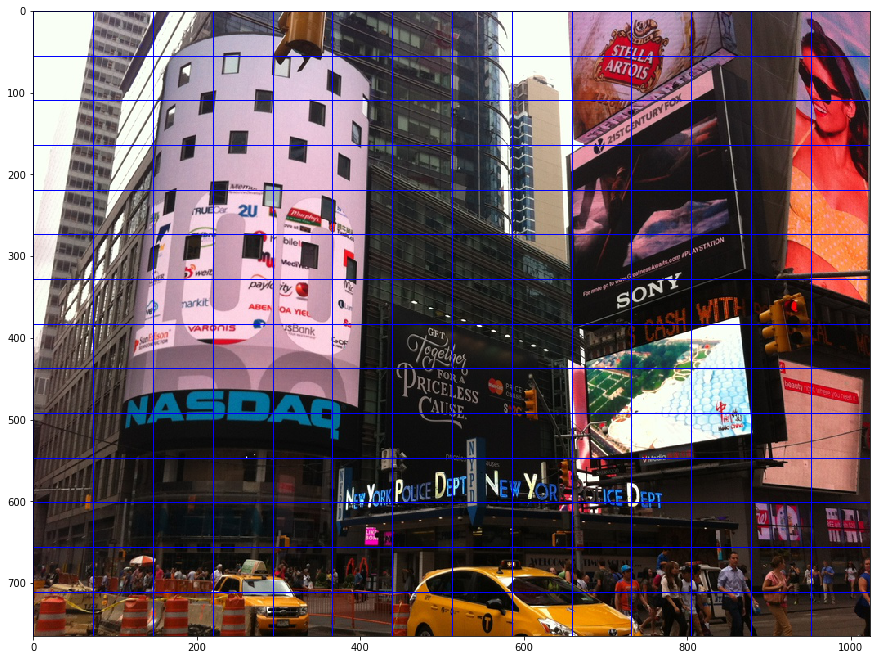

In [14]:
# i = random.randint(0, 127)
image_id = sp["image_id"][i]
im = np.array(Image.open(os.path.join("/home/like/Datasets/Pythia/train_images", image_id+".jpg")), dtype=np.uint8)
fig,ax = plt.subplots(1, figsize=(15, 15))
ax.imshow(im)
for j in range(195):
    pat = sp["bb_resnet"][i][j]
    rect = patches.Rectangle((pat[0], pat[1]),pat[2]-pat[0],pat[3]-pat[1],linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)
plt.show()